This code is the implementation of a dqn-agent which is able to solve the environment "Banana" without any previous knowledge about the setup.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt

import random
from collections import namedtuple, deque


from dqn_agent import Agent


from model import Network

import torch
import torch.nn.functional as F
import torch.optim as optim



In thd cell below we load the environment and set general properties of the environment such as action_size and state_size

In [2]:
env = UnityEnvironment(file_name="Banana.app")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In the following we set up the agent and monitor the progress of the training process

Episode 100	Average Score: 1.73
Episode 200	Average Score: 6.94
Episode 300	Average Score: 10.73
Episode 356	Average Score: 13.00
Environment solved in 256 episodes!	Average Score: 13.00


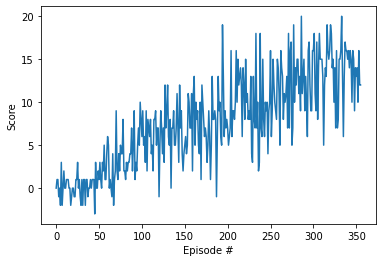

In [3]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1., eps_end=0.0, eps_decay=0.99):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]

        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.find_action(state,eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]      # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                     # see if episode has finished
    
            
           
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            
            score += reward
            
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'model.pt')
            
            break
    return scores

agent = Agent(state_size=len(env_info.vector_observations[0]), action_size=brain.vector_action_space_size, seed=0)

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()